
When a sandy seabed is subject to wave action and the wave orbital motion is strong enough to move sand grains, ripples often appear. The ripples induced by wave action are called “wave ripples”; their characteristics being different from those of the ripples generated by steady flows. The most striking difference between wave ripple fields and current ripple fields is the regularity of the former. Indeed, regular long-crested wave ripple fields are often observed on tidal beaches from which the sea has withdrawn at low water (see figure 1). 

https://en.wikipedia.org/wiki/Dune

Figure 1. Ripples observed at Sea Rim State Park, along the coast of east Texas close to the border with Louisiana (courtesy by Zoltan Sylvester).
![](http://www.coastalwiki.org/w/images/6/65/WaveRippleFormationFig0.jpg)

[Wave ripple formation](http://www.coastalwiki.org/wiki/Wave_ripple_formation)



Overview of large sand wave field and high-resolution difference map of two surveys approximately 21 hours apart illustrating both large-scale and small-scale sand wave migration and orientation. Migration is from right to left.
![](https://www.researchgate.net/profile/Daniel-Hanes/publication/252161559/figure/fig1/AS:669991225552924@1536749764962/Overview-of-large-sand-wave-field-and-high-resolution-difference-map-of-two-surveys.png)


Sea waves shape the bottom and generate different morphological patterns, which are characterized by a wide range of length scales. The ripples are the smallest bedforms but, notwithstanding their relatively small size, they play a prominent role in many transport processes. Indeed, usually, the flow separates at their crests and vortices are generated which increase momentum transfer, sediment transport and, in general, mixing phenomena. 
http://www.coastalwiki.org/wiki/Wave_ripples

http://nishitalab.org/user/nis/cdrom/pg/onoue.pdf

more complex

https://www.hindawi.com/journals/jam/2014/590358/



https://en.wikipedia.org/wiki/Reaction%E2%80%93diffusion_system

https://jasonwebb.github.io/reaction-diffusion-playground/

https://jasonwebb.github.io/reaction-diffusion-playground/images/screenshots/screenshot-1.png

https://jasonwebb.github.io/reaction-diffusion-playground/app.html


Blah blah blah


Emphasis, aka italics, with *asterisks* or _underscores_.

Strong emphasis, aka bold, with **asterisks** or __underscores__.

Combined emphasis with **asterisks and _underscores_**.

Strikethrough uses two tildes. ~~Scratch this.~~

[I'm an inline-style link](https://www.google.com)

[I'm an inline-style link with title](https://www.google.com "Google's Homepage")

[I'm a reference-style link][Arbitrary case-insensitive reference text]

[I'm a relative reference to a repository file](../blob/master/LICENSE)

[You can use numbers for reference-style link definitions][1]

Or leave it empty and use the [link text itself].

URLs and URLs in angle brackets will automatically get turned into links. 
http://www.example.com or <http://www.example.com> and sometimes 
example.com (but not on Github, for example).

Some text to show that the reference links can follow later.

[arbitrary case-insensitive reference text]: https://www.mozilla.org
[1]: http://slashdot.org
[link text itself]: http://www.reddit.com
Here's our logo (hover to see the title text):

Inline-style: 
![alt text](https://github.com/adam-p/markdown-here/raw/master/src/common/images/icon48.png "Logo Title Text 1")

Reference-style: 
![alt text][logo]

[logo]: https://github.com/adam-p/markdown-here/raw/master/src/common/images/icon48.png "Logo Title Text 2"

Inline `code` has `back-ticks around` it.

```javascript
var s = "JavaScript syntax highlighting";
alert(s);
```
 
```python
s = "Python syntax highlighting"
print s
```
 
```
No language indicated, so no syntax highlighting. 
But let's throw in a <b>tag</b>.
```


Colons can be used to align columns.

| Tables        | Are           | Cool  |
| ------------- |:-------------:| -----:|
| col 3 is      | right-aligned | $1600 |
| col 2 is      | centered      |   $12 |
| zebra stripes | are neat      |    $1 |

There must be at least 3 dashes separating each header cell.
The outer pipes (|) are optional, and you don't need to make the 
raw Markdown line up prettily. You can also use inline Markdown.

Markdown | Less | Pretty
--- | --- | ---
*Still* | `renders` | **nicely**
1 | 2 | 3

> Blockquotes are very handy in email to emulate reply text.
> This line is part of the same quote.

Quote break.

> This is a very long line that will still be quoted properly when it wraps. Oh boy let's keep writing to make sure this is long enough to actually wrap for everyone. Oh, you can *put* **Markdown** into a blockquote. 


<!-- TEASER_END -->

Let's first initialize the notebook:

In [1]:
import matplotlib
import numpy as np
np.set_printoptions(precision=6, suppress=True)
import os
%matplotlib inline
#%config InlineBackend.figure_format='retina'
%config InlineBackend.figure_format = 'svg'
import matplotlib.pyplot as plt
phi = (np.sqrt(5)+1)/2
fig_width = 10
figsize = (fig_width, fig_width/phi)
from IPython.display import display, HTML
def show_video(filename): 
    return HTML(data='<video src="{}" loop autoplay width="600" height="600"></video>'.format(filename))
%load_ext autoreload
%autoreload 2

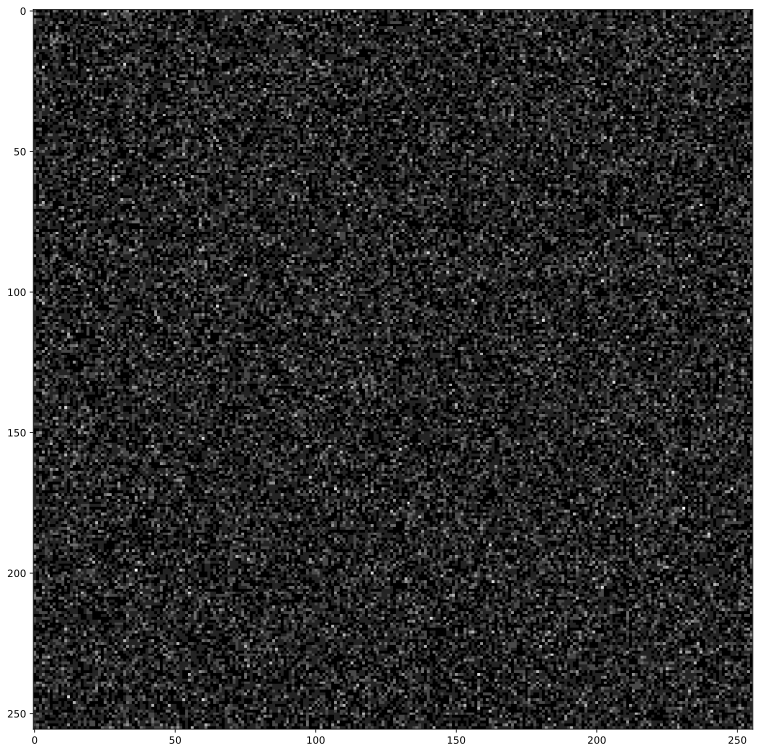

In [2]:
N_particles = 2**16
bins = 2**8

seed = 1998
np.random.seed(seed)
x, y = np.random.rand(N_particles), np.random.rand(N_particles)


height, edge_x, edge_y = np.histogram2d(x, y,
                                    bins=[bins, bins],
                                    range=[[0, 1], [0, 1]],
                                    density=True)

subplotpars = matplotlib.figure.SubplotParams(left=0., right=1., bottom=0., top=1., wspace=0., hspace=0.,)

fig, ax = plt.subplots(figsize=(fig_width, fig_width), subplotpars=subplotpars)
ax.imshow(height, vmin=0, vmax=height.max(), cmap=plt.gray());

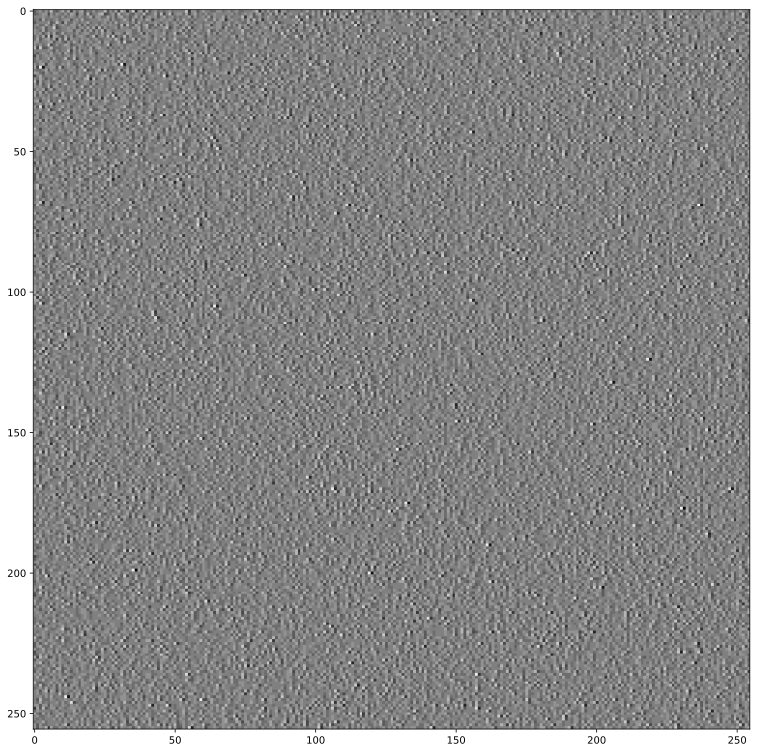

In [3]:
fig, ax = plt.subplots(figsize=(fig_width, fig_width), subplotpars=subplotpars)
ax.imshow(np.diff(height, n=1, axis=1));

In [4]:
x


array([0.559446, 0.761492, 0.244532, ..., 0.1454  , 0.770058, 0.493903])

In [5]:
x*bins


array([143.218068, 194.94195 ,  62.600078, ...,  37.222453, 197.134854,
       126.439176])

In [6]:
(x*bins).astype(int)

array([143, 194,  62, ...,  37, 197, 126])

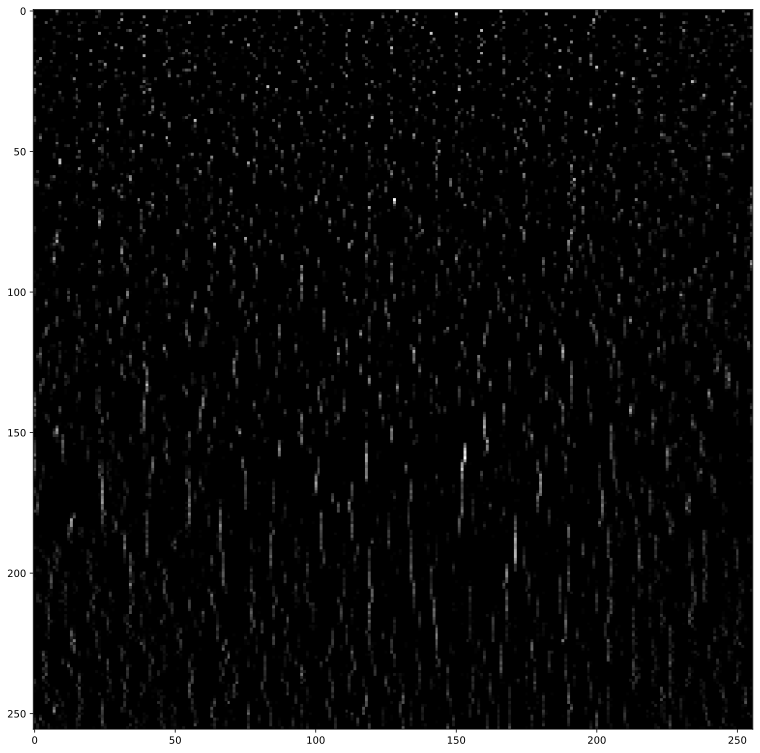

In [7]:
def wind_ripples(   N_step = 2**10,
                    L = 1 / 2**5, # saltation step in the y direction
                    D = 1 / 2**18, # diffusion per step
                    b = 1 / 2**10,
                    kappa = 1,
                    seed = None,
                ):

    np.random.seed(seed)
    x, y = np.random.rand(N_particles), np.random.rand(N_particles)

    for i_step in range(N_step):
        x, y = x + D/(i_step+1)*np.random.randn(N_particles), y + D/(i_step+1)*np.random.randn(N_particles)    
        x, y = np.mod(x, 1), np.mod(y, 1)

        height, edge_x, edge_y = np.histogram2d(x, y, bins=[bins, bins], range=[[0, 1], [0, 1]], density=False)
        slope = np.diff(height, n=1, axis=1)

        ind_x, ind_y = (x*(bins-1)).astype(int), (y*(bins-1)).astype(int)
        y += L + b * np.tanh(kappa * slope[ind_x, ind_y])

    return height, slope

height, slope = wind_ripples()
fig, ax = plt.subplots(figsize=(fig_width, fig_width), subplotpars=subplotpars)
ax.imshow(height, vmin=0, vmax=height.max(), cmap=plt.gray());    

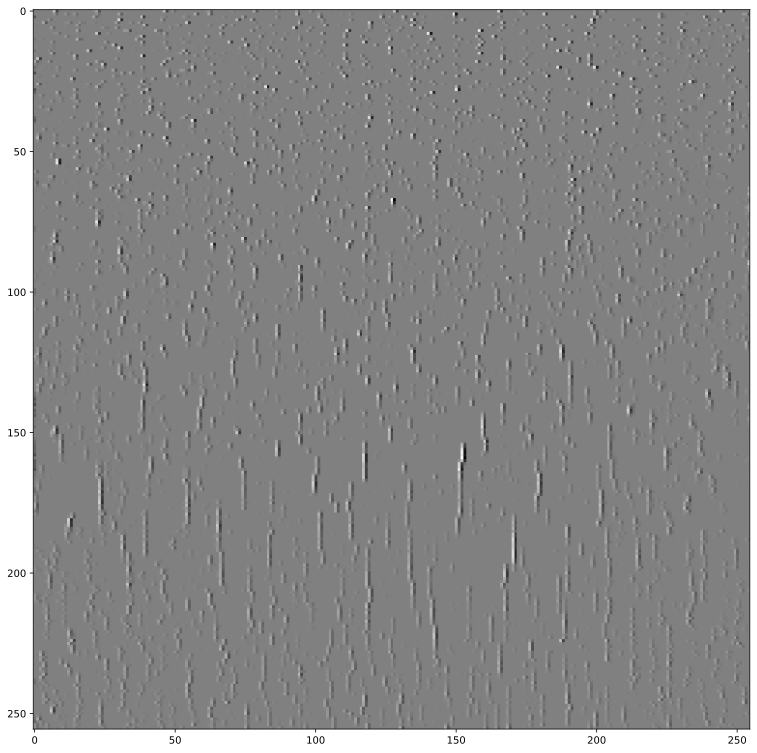

In [8]:
fig, ax = plt.subplots(figsize=(fig_width, fig_width), subplotpars=subplotpars)
ax.imshow(slope, cmap=plt.viridis());

In [9]:
N_scan = 9

kappa=-5.0


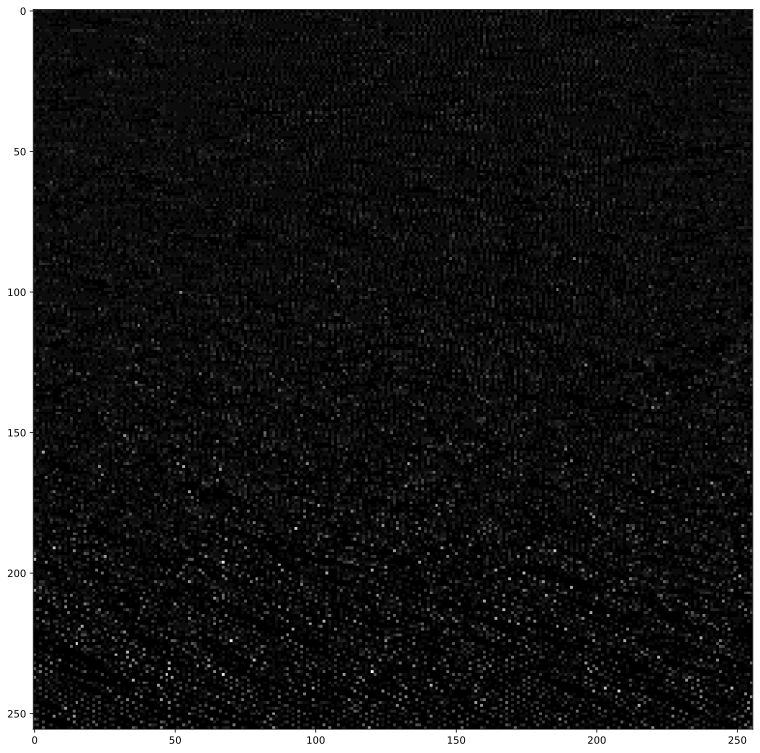

kappa=-3.75


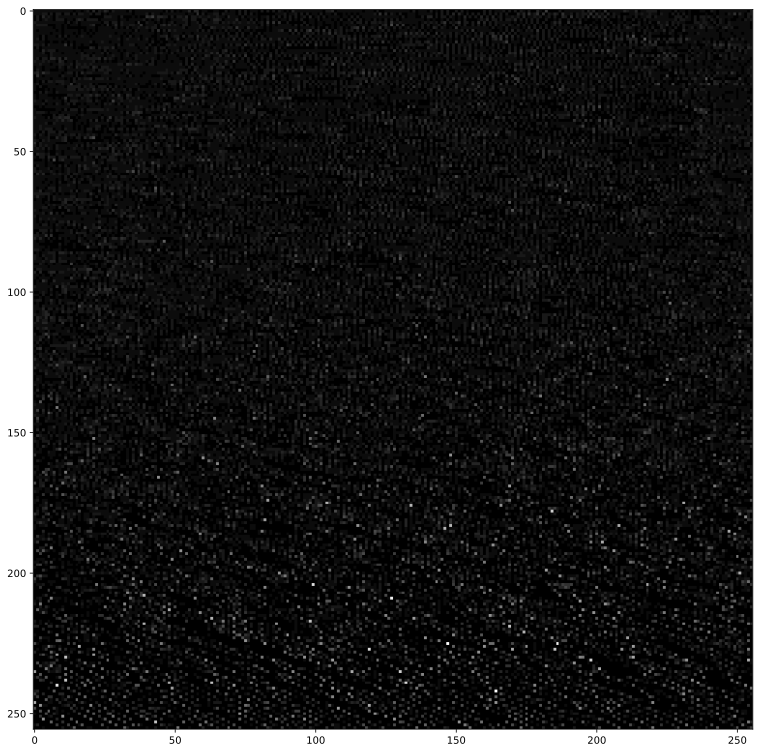

kappa=-2.5


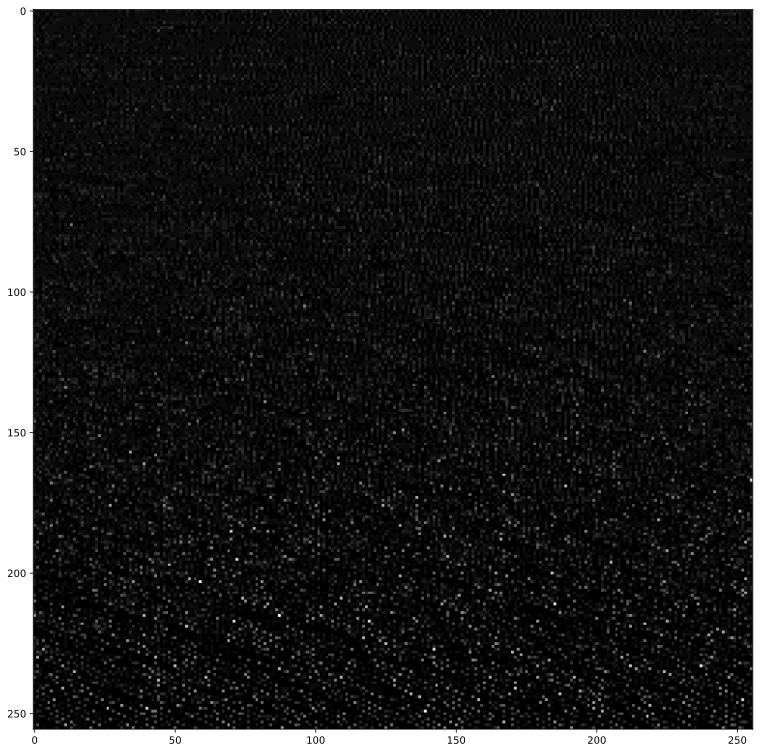

kappa=-1.25


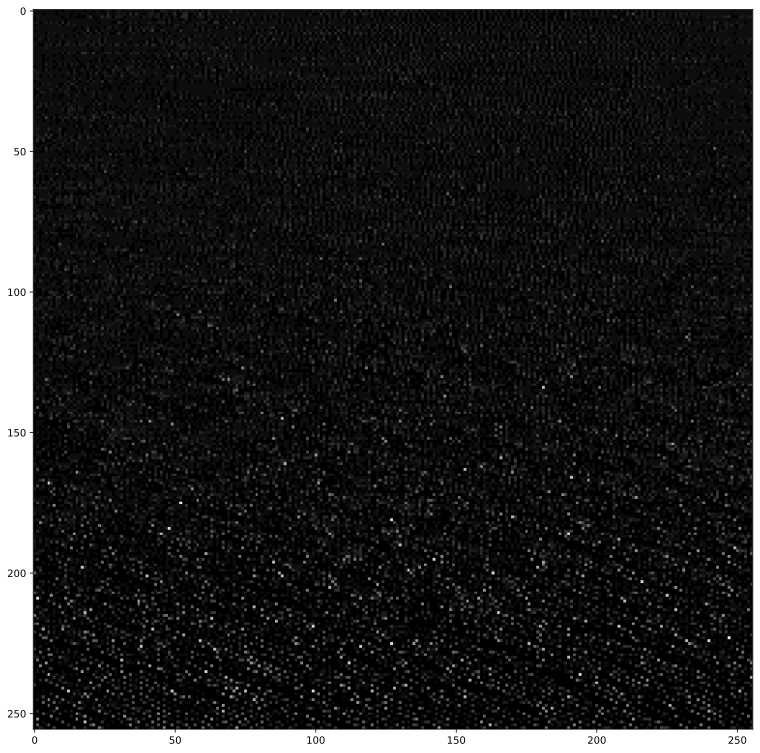

kappa=0.0


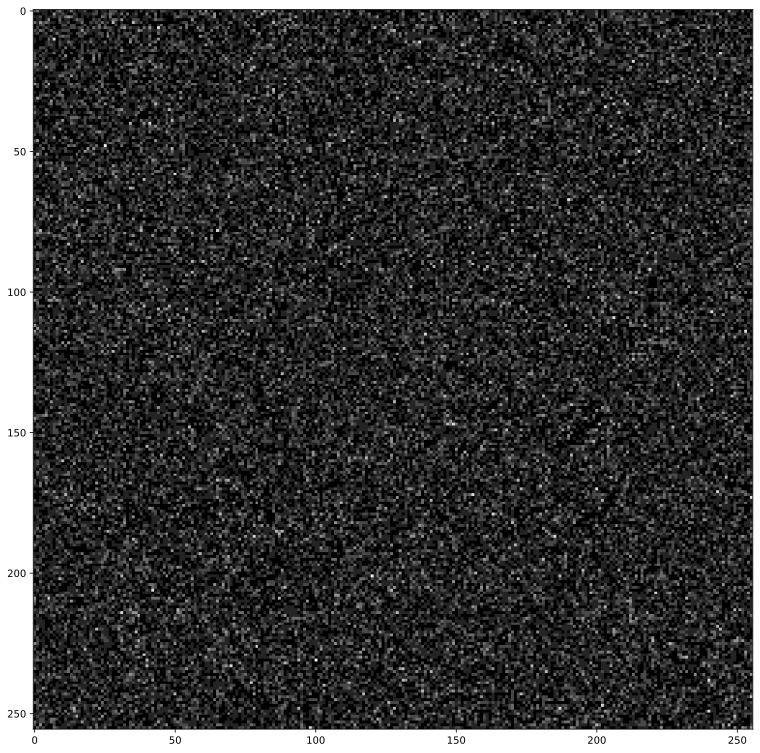

kappa=1.25


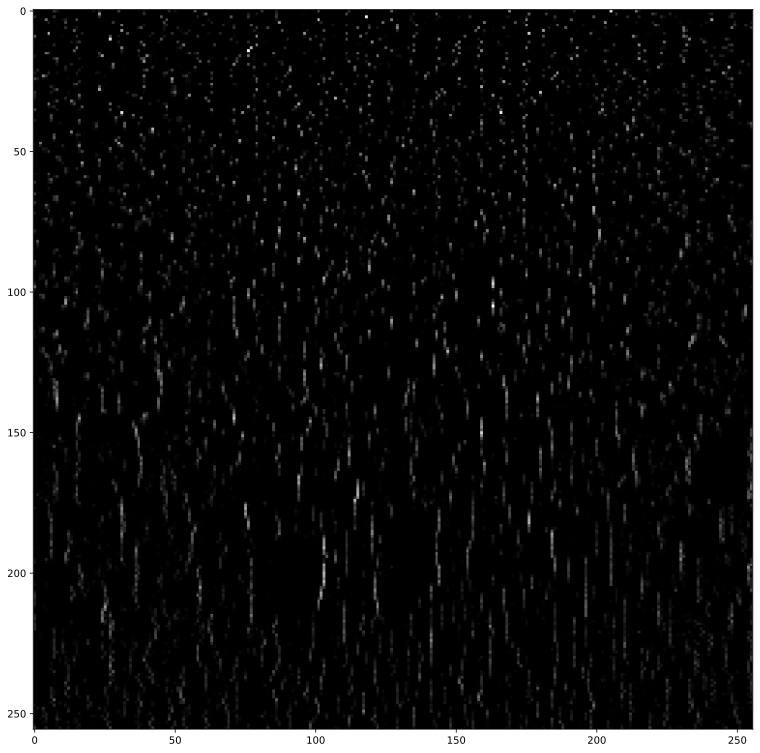

kappa=2.5


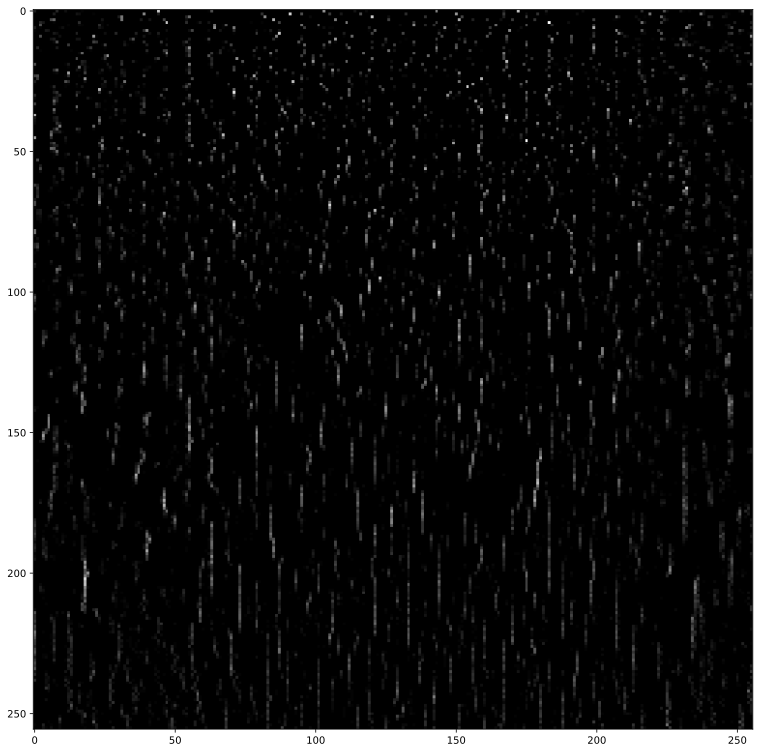

kappa=3.75


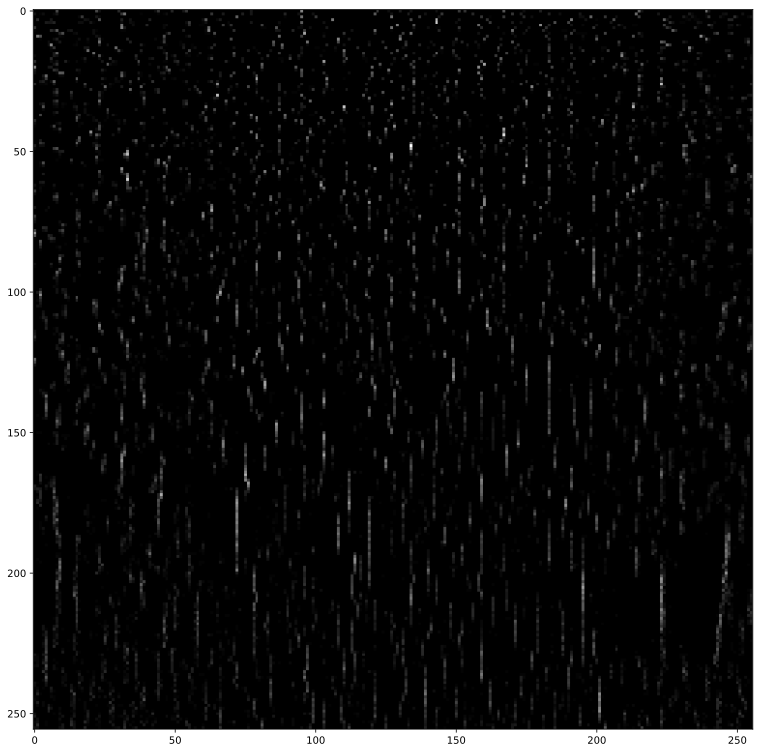

kappa=5.0


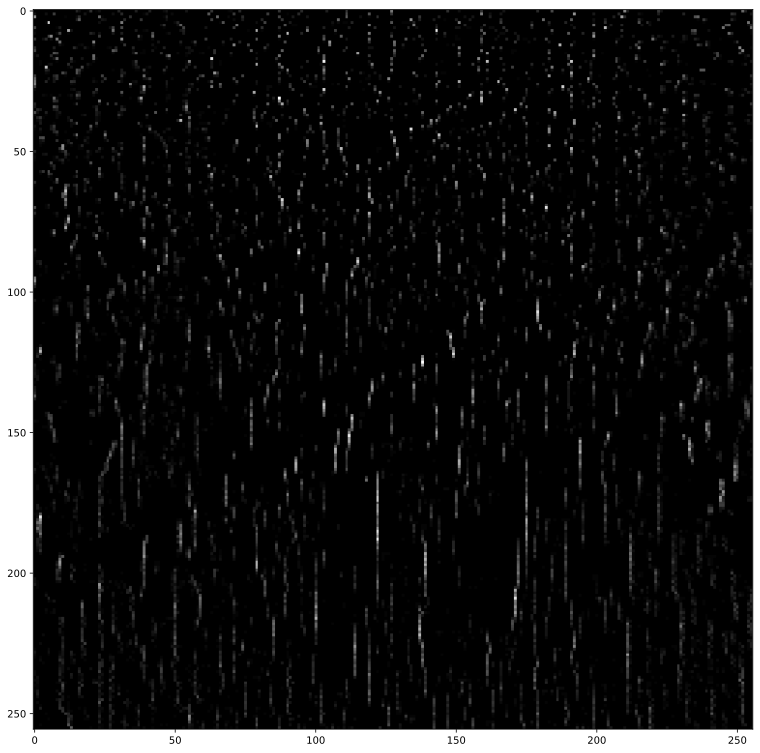

In [10]:

for kappa_ in np.linspace(0, 5, N_scan):
    print(f'kappa={kappa_}')    
    height, slope = wind_ripples(kappa=kappa_)
    fig, ax = plt.subplots(figsize=(fig_width, fig_width), subplotpars=subplotpars)
    # ax.imshow(height, vmin=0, vmax=height.max(), cmap=plt.gray())
    ax.imshow(slope, cmap=plt.viridis())  
    plt.show()

D=3.814697265625e-06


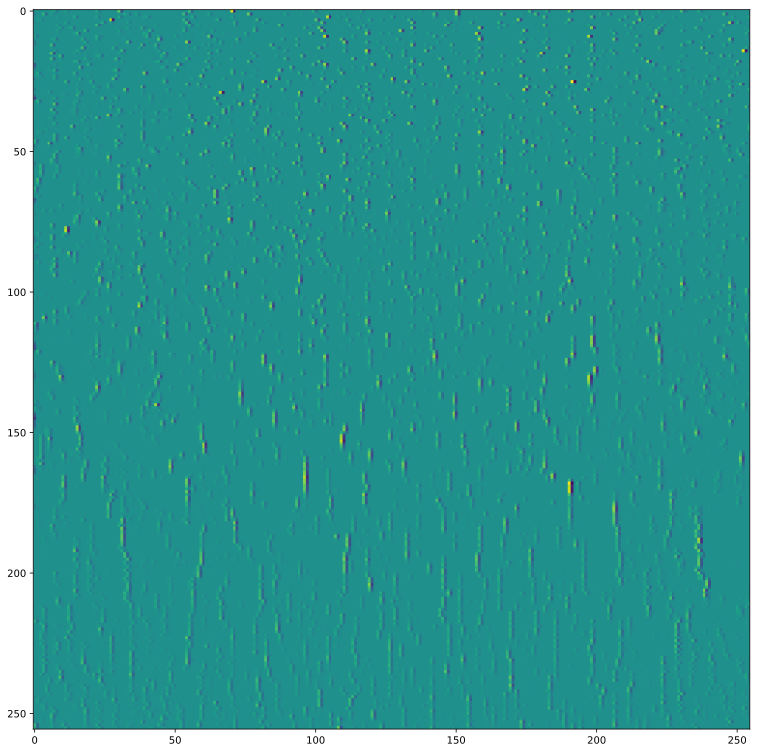

D=1.078959321878887e-05


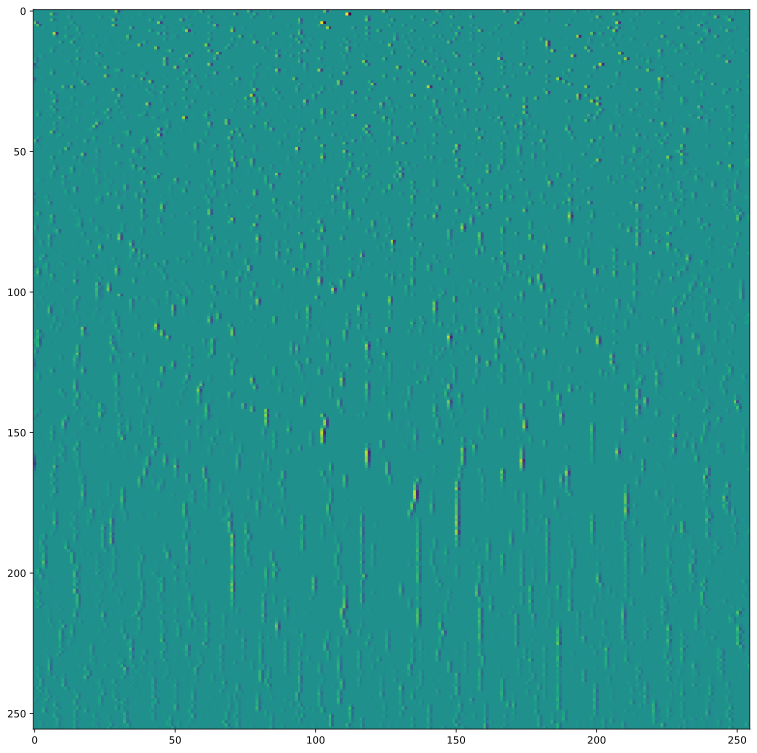

D=3.0517578125e-05


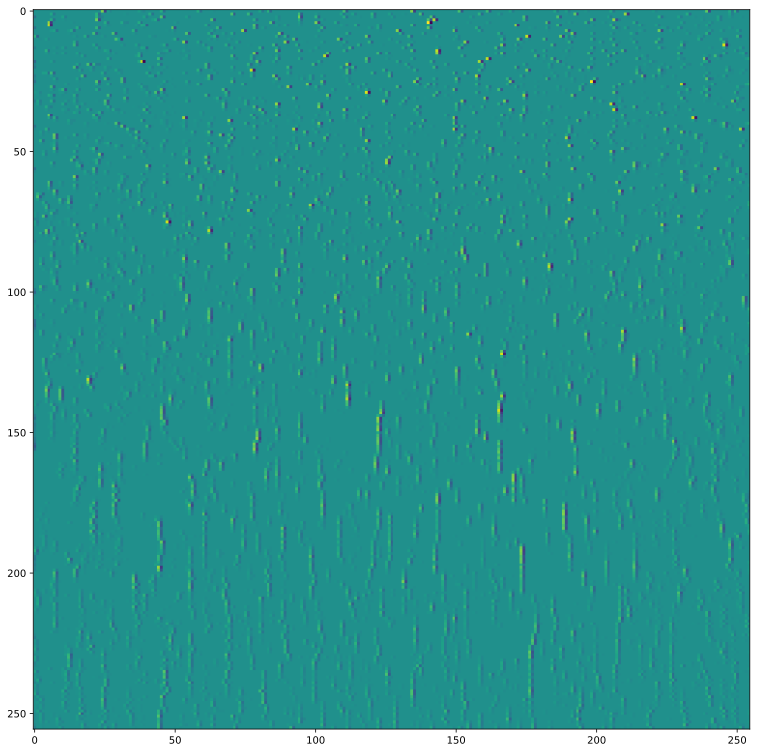

D=8.6316745750311e-05


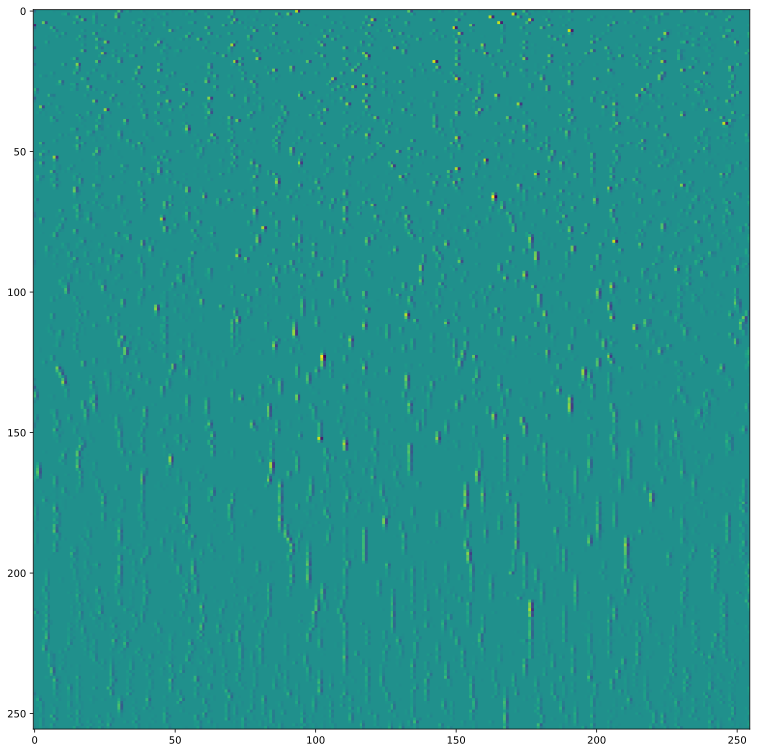

D=0.0002441406250000001


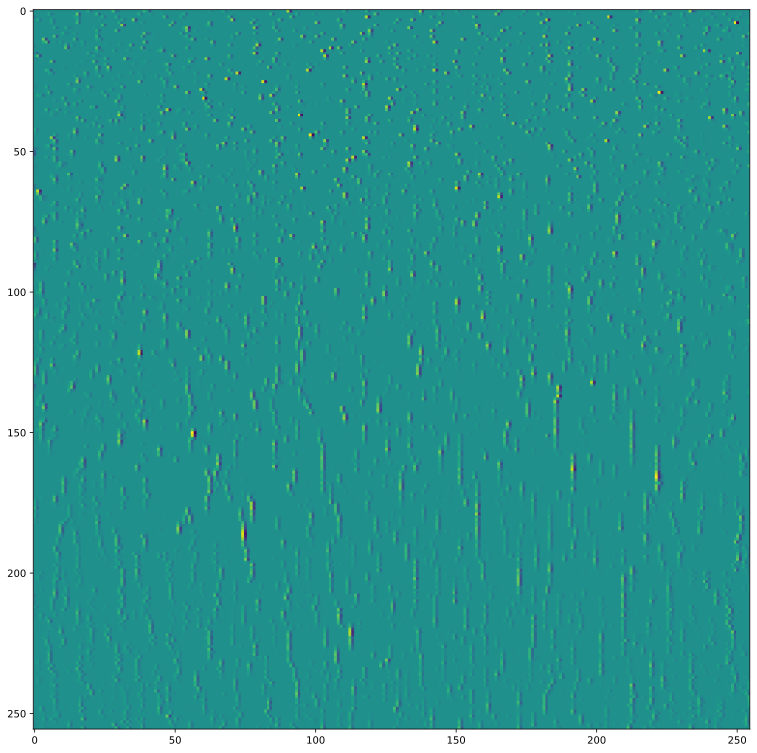

D=0.0006905339660024875


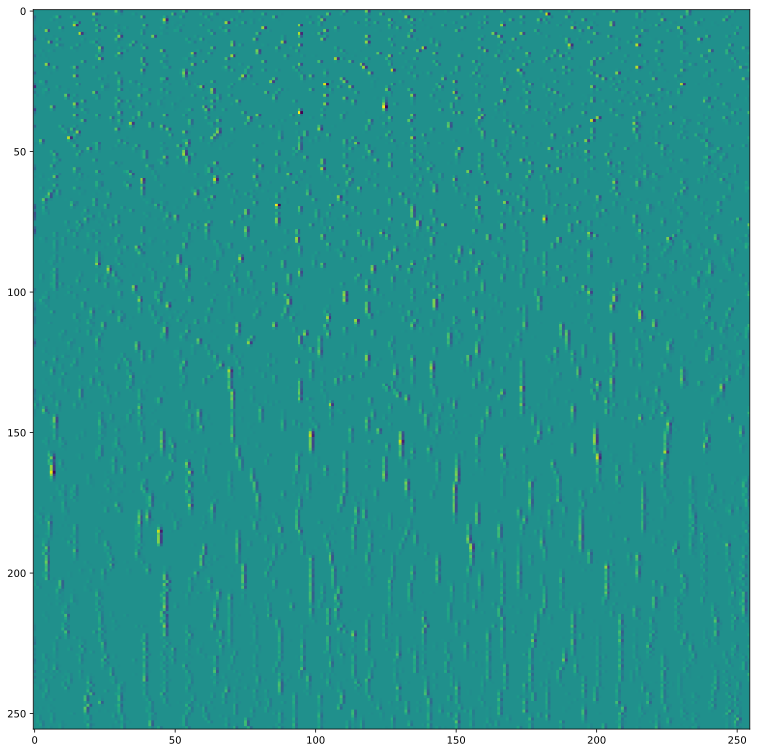

D=0.0019531249999999996


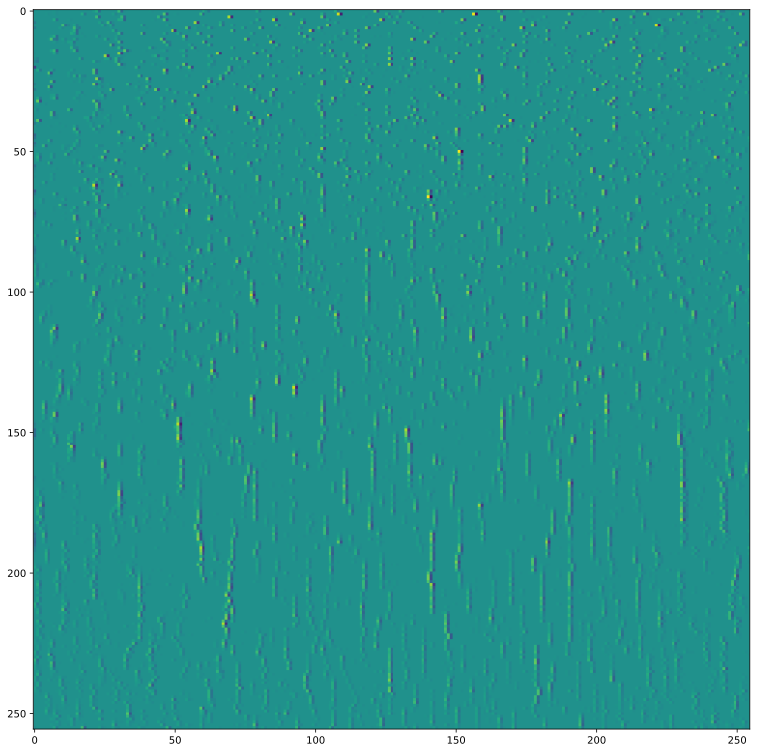

D=0.005524271728019903


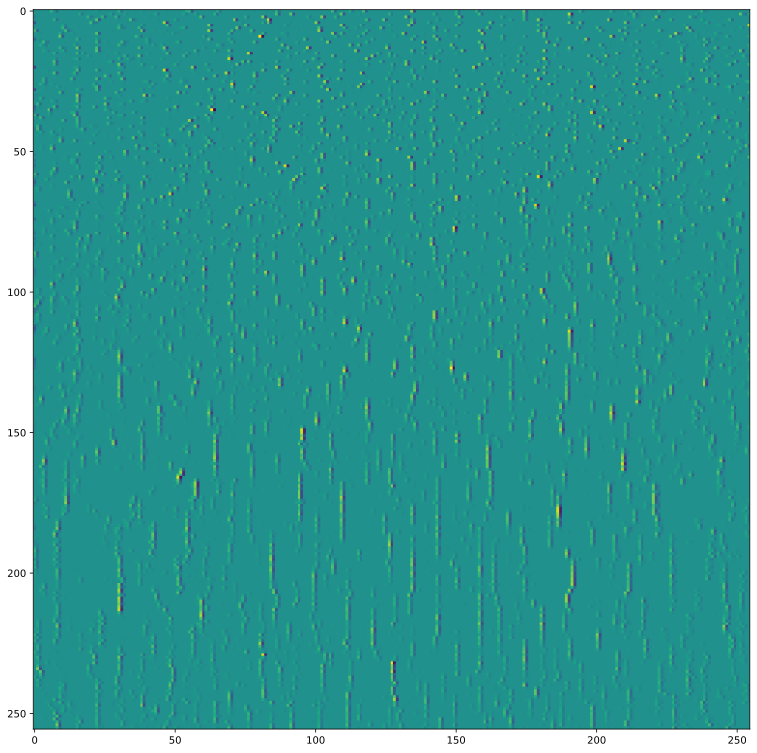

D=0.015625


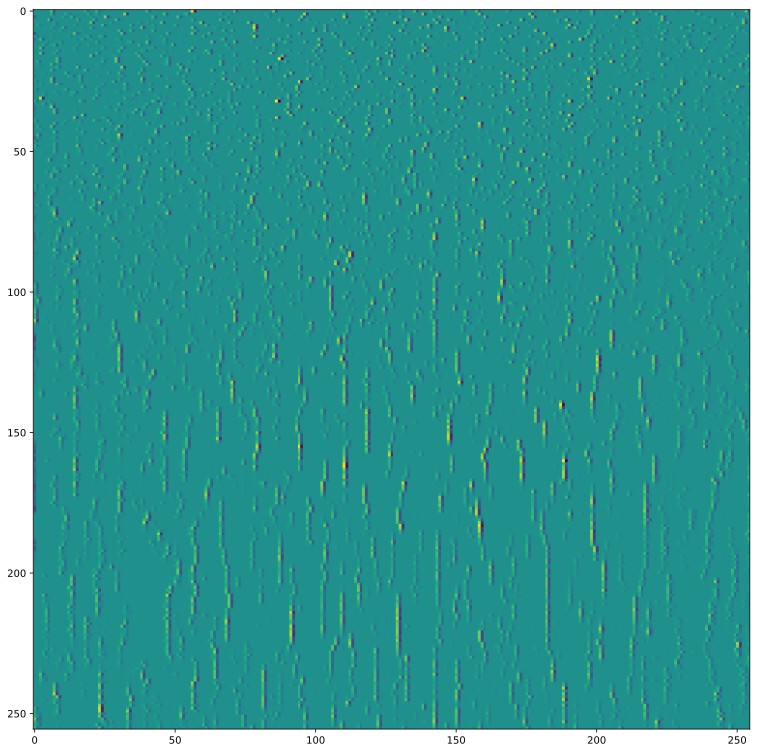

In [11]:
for D_ in np.geomspace(1 / 2**18, 1 / 2**6, N_scan):
    print(f'D={D_}')    
    height, slope = wind_ripples(D=D_)
    fig, ax = plt.subplots(figsize=(fig_width, fig_width), subplotpars=subplotpars)
    # ax.imshow(height, vmin=0, vmax=height.max(), cmap=plt.gray())
    ax.imshow(slope, cmap=plt.viridis())  
    plt.show()

b=3.814697265625e-06


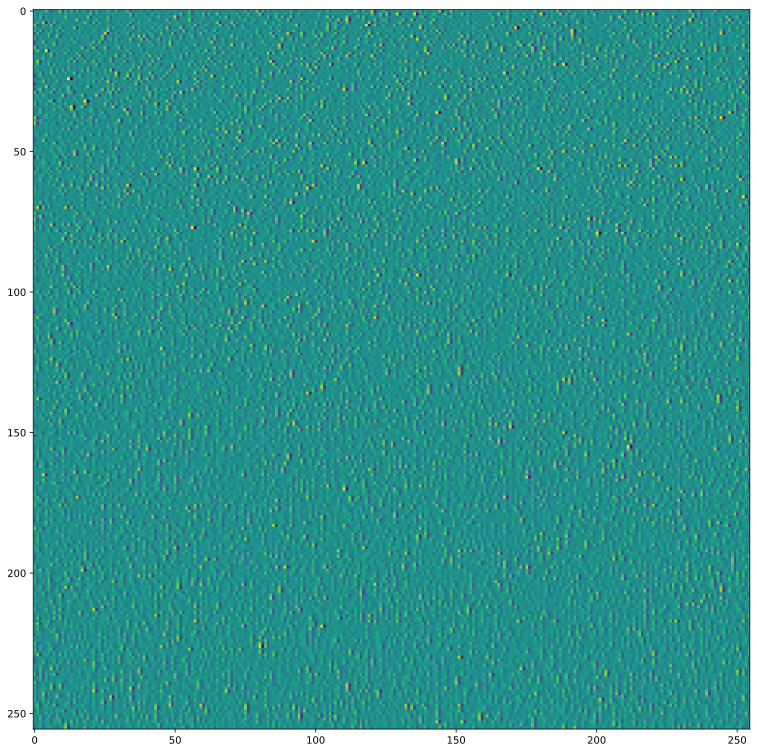

b=1.078959321878887e-05


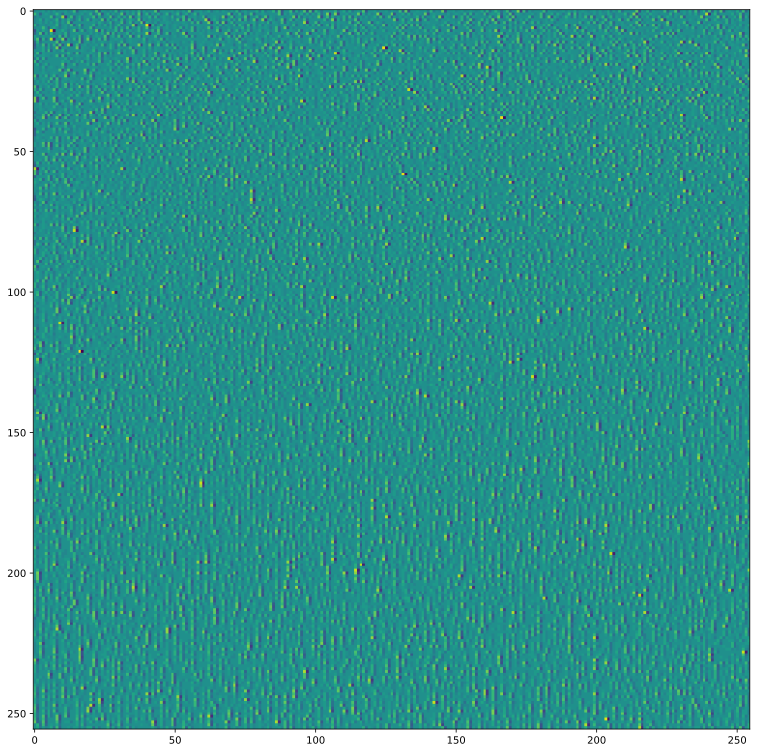

b=3.0517578125e-05


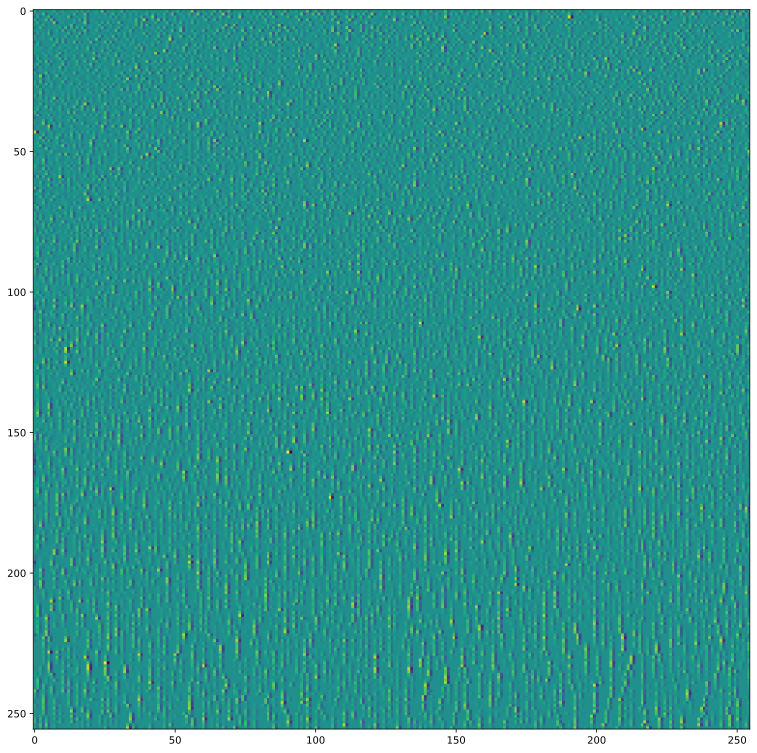

b=8.6316745750311e-05


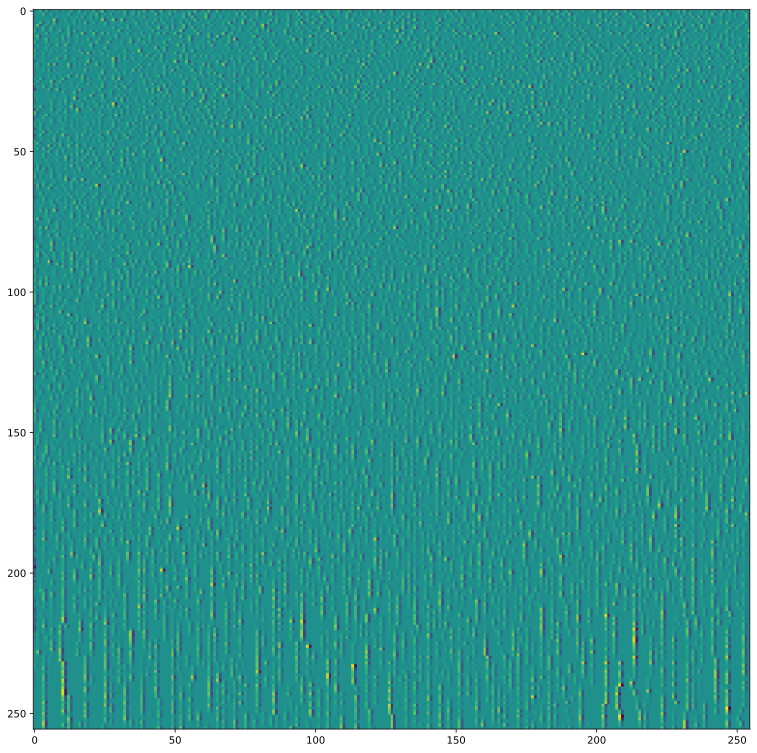

b=0.0002441406250000001


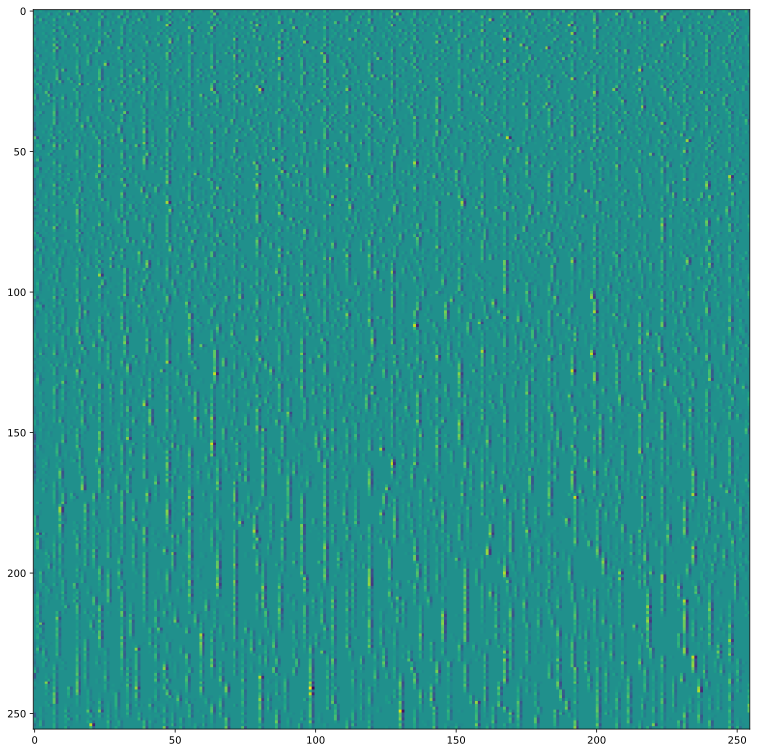

b=0.0006905339660024875


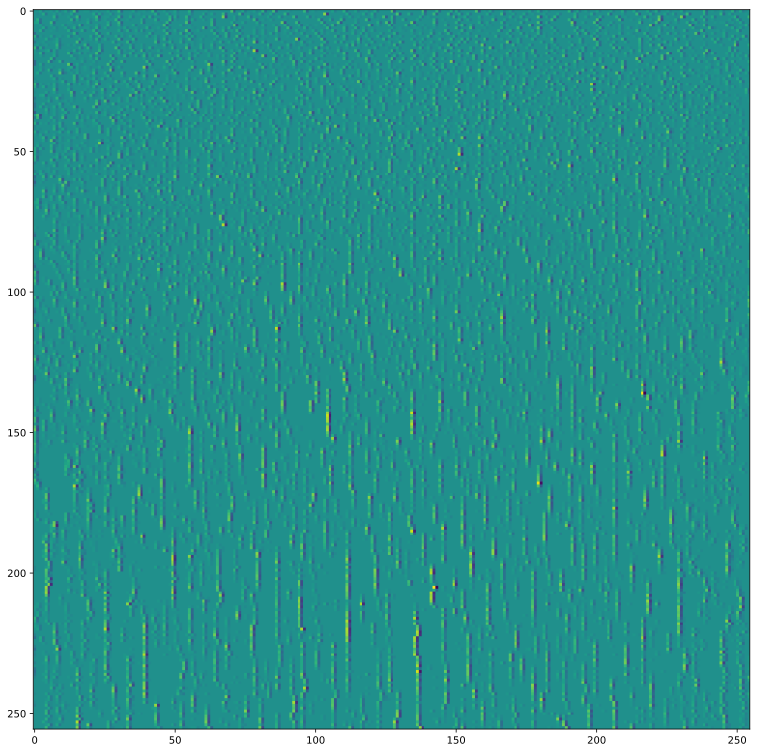

b=0.0019531249999999996


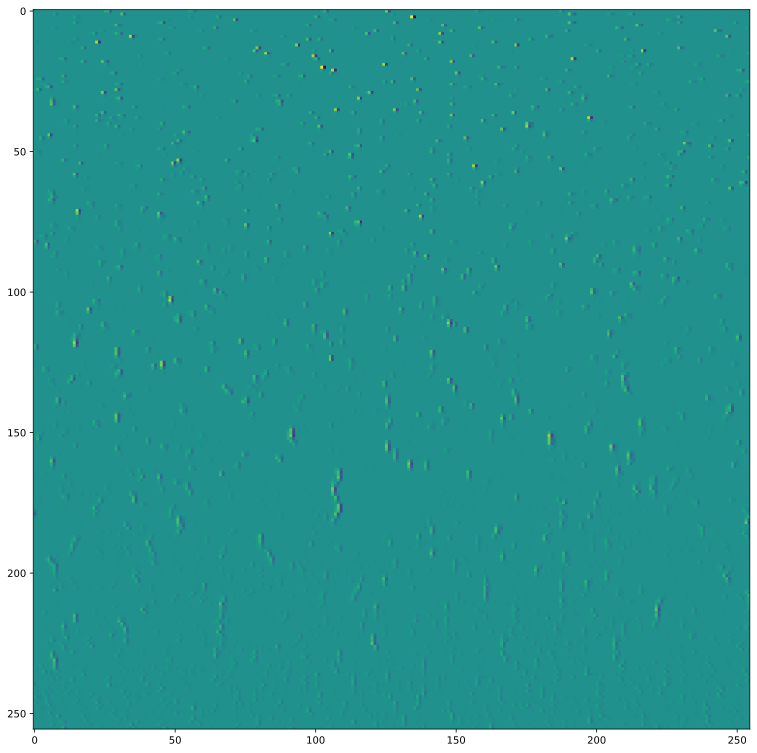

b=0.005524271728019903


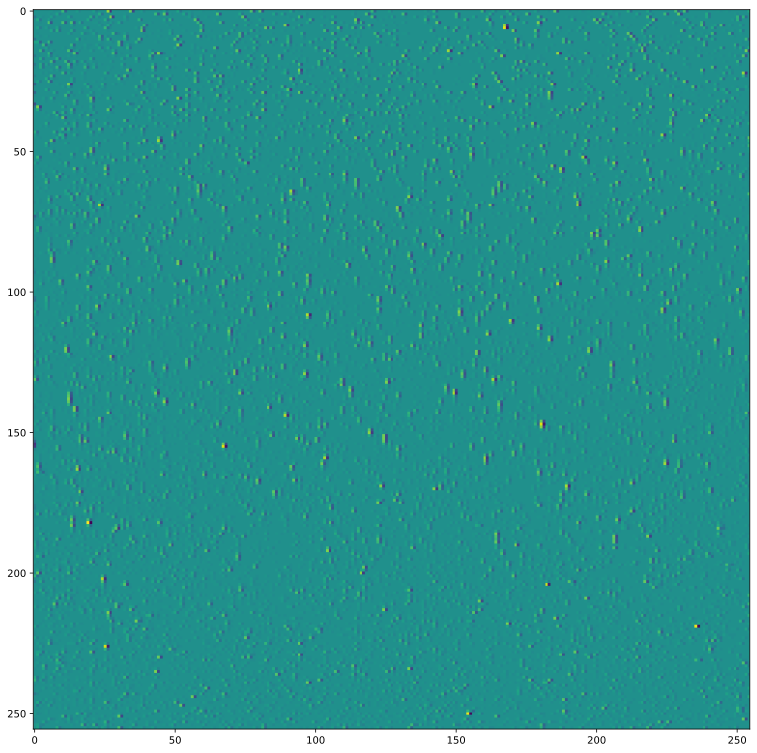

b=0.015625


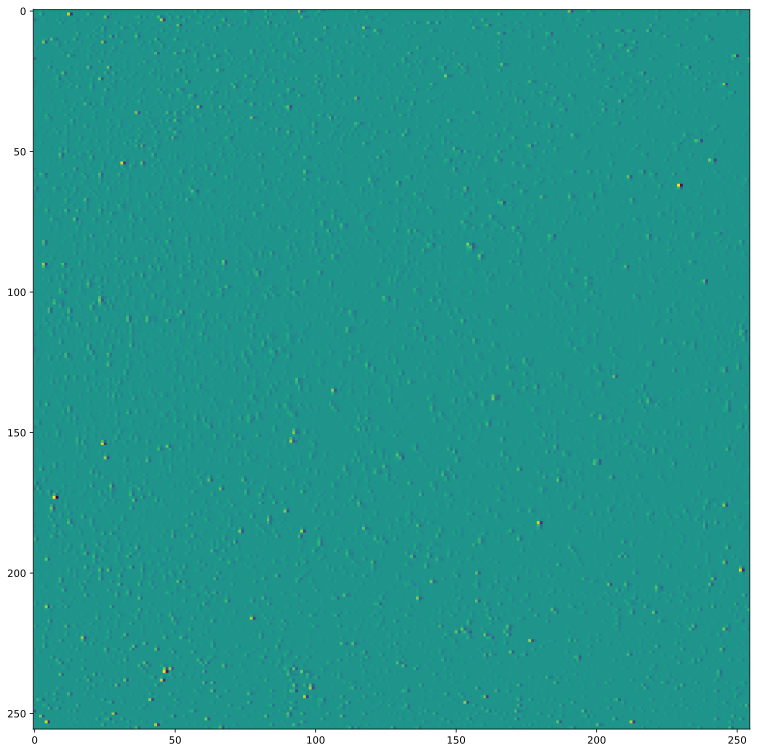

In [12]:
for b_ in np.geomspace(1 / 2**18, 1 / 2**6, N_scan):
    print(f'b={b_}')    
    height, slope = wind_ripples(b=b_)
    fig, ax = plt.subplots(figsize=(fig_width, fig_width), subplotpars=subplotpars)
    # ax.imshow(height, vmin=0, vmax=height.max(), cmap=plt.gray())
    ax.imshow(slope, cmap=plt.viridis())  
    plt.show()

## some book keeping for the notebook

In [14]:
%pip install watermark

Note: you may need to restart the kernel to use updated packages.


In [13]:
%load_ext watermark
%watermark -i -h -m -v -p numpy,matplotlib,scipy,pillow,imageio  -r -g -b

ModuleNotFoundError: No module named 'watermark'